<a href="https://colab.research.google.com/github/lilyzhizhou/Datathon-4/blob/main/Datathon4_APACHE_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA CLEANING**

In [1]:
# Import libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import plotly.express as px
import io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import CategoricalNB, GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import RocCurveDisplay, roc_curve, accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import statsmodels.api as sm
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Load in data
data_raw = pd.read_csv('datathon4.csv')

In [3]:
print(data_raw.shape)
data_raw.head()

(91713, 186)


,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,1

In [4]:
# Keeping only apache covariate variables

columns_to_keep = ['hospital_death', 'icu_admit_source'] + [col for col in data_raw.columns if col.endswith('apache')]

data = data_raw[columns_to_keep]

print(data.shape)
data.head()

(91713, 27)


,hospital_death,icu_admit_source,albumin_apache,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache
0,0,Floor,2.3,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1
1,0,Floor,NaN,0.0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,37.0,37.0,51.0,7.45,33.0,145.0,35.1,NaN,1.0,12.7
2,0,Accident & Emergency,NaN,0.0,NaN,NaN,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0.0,68.0,NaN,NaN,NaN,NaN,37.0,NaN,36.7,NaN,0.0,NaN
3,0,Operating Room / Recovery,NaN,0.0,NaN,NaN,NaN,0.6,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1.0,60.0,30.0,30.0,142.0,7.39,4.0,NaN,34.8,NaN,1.0,8.0
4,0,Accident & Emergency,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,0.0,103.0,NaN,NaN,NaN,NaN,16.0,NaN,36.7,NaN,0.0,NaN


In [5]:
# Filter to only have those who were admitted straight from admission
data = data[data['icu_admit_source'] == 'Accident & Emergency']
data['icu_admit_source'].value_counts()

# Drop admit source
data = data.drop('icu_admit_source', axis = 1)

In [6]:
# Drop GCS apache variables
gcs_to_drop = ['gcs_verbal_apache', 'gcs_motor_apache', 'gcs_eyes_apache', 'gcs_unable_apache']
data = data.drop(columns=gcs_to_drop)

Checking NaN values in the dataset


---



In [7]:
# Checking for missing data
missing_count = data.isna().sum()
total_count = len(data)
missing_percentage = (missing_count / total_count) * 100

missing_info = pd.DataFrame({'Missing Count': missing_count, 'Missing Percentage': missing_percentage.round(0)})
print(missing_info.sort_values(by='Missing Percentage', ascending=False))

                     Missing Count  Missing Percentage
fio2_apache                  44326                82.0
paco2_apache                 44326                82.0
paco2_for_ph_apache          44326                82.0
pao2_apache                  44326                82.0
ph_apache                    44326                82.0
bilirubin_apache             32849                61.0
albumin_apache               30713                57.0
urineoutput_apache           27025                50.0
wbc_apache                   14088                26.0
hematocrit_apache            12965                24.0
bun_apache                   11303                21.0
creatinine_apache            11173                21.0
sodium_apache                11009                20.0
glucose_apache                6744                12.0
temp_apache                   2483                 5.0
ventilated_apache              286                 1.0
map_apache                     431                 1.0
resprate_a

In [8]:
# Do missing observations have higher deaths?
high_missing = missing_info[missing_info['Missing Percentage'] >= 50].index.tolist()

data_na = data[data[high_missing].isna().any(axis=1)]

print(data_na.shape)
data_na.head()

(51810, 22)


,hospital_death,albumin_apache,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache
2,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,102.0,NaN,0.0,68.0,NaN,NaN,NaN,NaN,37.0,NaN,36.7,NaN,0.0,NaN
4,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,60.0,NaN,0.0,103.0,NaN,NaN,NaN,NaN,16.0,NaN,36.7,NaN,0.0,NaN
5,0,NaN,0.0,NaN,13.0,0.71,NaN,156.0,113.0,44.2,0.0,130.0,NaN,NaN,NaN,NaN,35.0,137.0,36.6,NaN,0.0,10.9
6,0,NaN,0.0,NaN,18.0,0.78,1.0,197.0,133.0,33.5,1.0,138.0,43.0,43.0,370.0,7.42,53.0,135.0,35.0,NaN,1.0,5.9
7,0,NaN,0.0,NaN,48.0,2.05,NaN,164.0,120.0,22.6,0.0,60.0,NaN,NaN,NaN,NaN,28.0,140.0,36.6,NaN,1.0,12.8


In [9]:
# Checking for death imbalance among NA observations

# Compute the count of each class in the 'target' column
counts = data_na['hospital_death'].value_counts()

# Define colors for the pie chart sections
colors = ['#a3416c', '#ebc898']

# Construct a pie chart with plotly
# 'names' are the class labels, and 'values' are the counts for each class
fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # creates a donut-styled pie chart
    title='Distribution of death',
    color_discrete_sequence=colors
)

# Update the layout of the pie chart for better presentation and clarity
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='target'
    ),
    title=dict(
        text='Distribution of Classes in death',
        x=0.45,
        xanchor='center',
        y=0.95,
        yanchor='top',
        font=dict(size=16)
    ),
    width=500,
    height=350
)

# Display the pie chart
fig.show()

The distribution of pts with missing values is the same as the overall

should be ok to remove variables that have over 50% missing

In [10]:
# Drop Variables missing 50% or more
data = data.drop(columns=high_missing)

print(data.shape)
data

(54060, 14)


,hospital_death,arf_apache,bun_apache,creatinine_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache
2,0,0.0,NaN,NaN,NaN,102.0,NaN,0.0,68.0,37.0,NaN,36.7,0.0,NaN
4,0,0.0,NaN,NaN,NaN,60.0,NaN,0.0,103.0,16.0,NaN,36.7,0.0,NaN
5,0,0.0,13.0,0.71,156.0,113.0,44.2,0.0,130.0,35.0,137.0,36.6,0.0,10.90
6,0,0.0,18.0,0.78,197.0,133.0,33.5,1.0,138.0,53.0,135.0,35.0,1.0,5.90
7,0,0.0,48.0,2.05,164.0,120.0,22.6,0.0,60.0,28.0,140.0,36.6,1.0,12.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91705,0,0.0,15.0,0.80,240.0,88.0,NaN,0.0,54.0,13.0,134.0,36.4,0.0,NaN
91706,0,0.0,15.0,0.70,91.0,55.0,41.0,0.0,62.0,12.0,139.0,36.6,0.0,7.14
91707,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91710,0,0.0,33.0,2.30,538.0,158.0,36.0,0.0,57.0,4.0,135.0,35.8,0.0,17.55


In [11]:
# Remove observations with NaN in the binary variables
column_to_clean = ['arf_apache', 'intubated_apache', 'ventilated_apache']
data = data.dropna(subset=column_to_clean)

In [12]:
data.isna().sum()

hospital_death           0
arf_apache               0
bun_apache           11017
creatinine_apache    10887
glucose_apache        6458
heart_rate_apache       68
hematocrit_apache    12679
intubated_apache         0
map_apache             145
resprate_apache        319
sodium_apache        10723
temp_apache           2197
ventilated_apache        0
wbc_apache           13802
dtype: int64

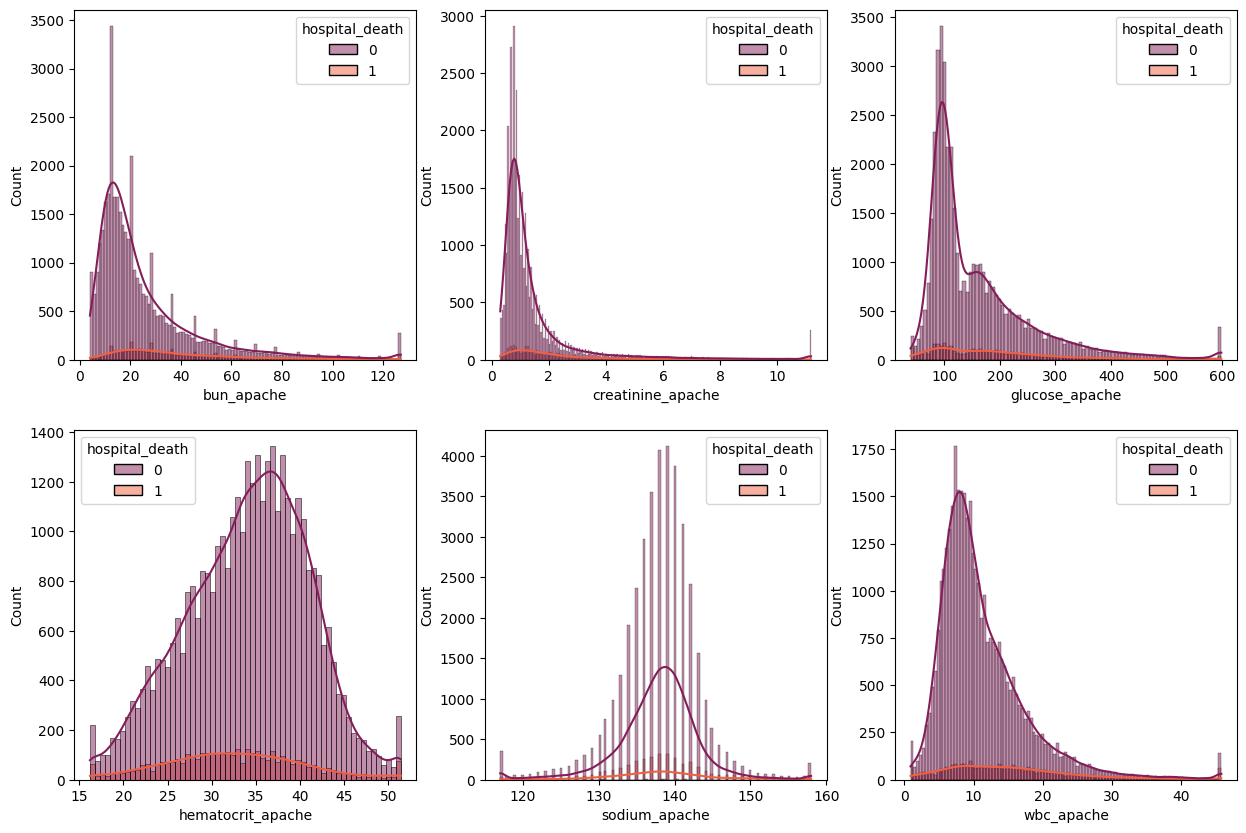

In [13]:
# Can other missing variables be imputed w median/mean?
low_missing = missing_info.loc[(missing_info['Missing Percentage'] >= 10) & (missing_info['Missing Percentage'] < 50)].index.tolist()

len(low_missing)

# checking the difference in distribution

# Create a grid of subplots with 2 rows and 3 columns
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))

# Loop over each feature in numerical and multinomial lists
target_column = 'hospital_death'

for i, column in enumerate(low_missing):
    # Calculate the position for the subplot; x is the row index and y is the column index
    x = i // 3
    y = i % 3

    # Plot a histogram of the feature split by the 'target' class
    # kde=True adds a Kernel Density Estimate plot to smooth the histogram, providing a clearer view of the data distribution
    sns.histplot(data, x=column, hue= target_column, kde=True, palette='rocket', ax=axs[x][y])

# Display all the subplots
plt.show()

Skewed distribution, can impute with median

In [14]:
data.columns

Index(['hospital_death', 'arf_apache', 'bun_apache', 'creatinine_apache',
       'glucose_apache', 'heart_rate_apache', 'hematocrit_apache',
       'intubated_apache', 'map_apache', 'resprate_apache', 'sodium_apache',
       'temp_apache', 'ventilated_apache', 'wbc_apache'],
      dtype='object')

In [15]:
columns_to_impute = ['bun_apache', 'creatinine_apache',
       'glucose_apache', 'heart_rate_apache', 'hematocrit_apache',
       'map_apache', 'resprate_apache', 'sodium_apache',
       'temp_apache', 'wbc_apache']

for column in columns_to_impute:
    median_value = data[column].median()
    data[column].fillna(median_value, inplace=True)

In [16]:
data.isna().sum()

hospital_death       0
arf_apache           0
bun_apache           0
creatinine_apache    0
glucose_apache       0
heart_rate_apache    0
hematocrit_apache    0
intubated_apache     0
map_apache           0
resprate_apache      0
sodium_apache        0
temp_apache          0
ventilated_apache    0
wbc_apache           0
dtype: int64

In [17]:
# Export dataset
data.to_csv('data_apache_clean.csv')

# **NEURAL NETS MODEL**

In [9]:
# Load libraries

# !pip install torch

# importing torch as t
import torch as t
import numpy as np
from torch.nn.functional import sigmoid, relu, tanh
import torch.nn as nn
import matplotlib.pyplot as pl
from torch.optim import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
from torch.nn import BCELoss

from torch.nn import Tanh, Linear, Sequential, Sigmoid, Dropout

In [2]:
data = pd.read_csv('data_apache_clean.csv')
data.head()

,Unnamed: 0,hospital_death,arf_apache,bun_apache,creatinine_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache
0,2,0,0.0,19.0,1.00,124.0,102.0,34.5,0.0,68.0,37.0,138.0,36.7,0.0,9.8
1,4,0,0.0,19.0,1.00,124.0,60.0,34.5,0.0,103.0,16.0,138.0,36.7,0.0,9.8
2,5,0,0.0,13.0,0.71,156.0,113.0,44.2,0.0,130.0,35.0,137.0,36.6,0.0,10.9
3,6,0,0.0,18.0,0.78,197.0,133.0,33.5,1.0,138.0,53.0,135.0,35.0,1.0,5.9
4,7,0,0.0,48.0,2.05,164.0,120.0,22.6,0.0,60.0,28.0,140.0,36.6,1.0,12.8


In [3]:
data = data.drop('Unnamed: 0', axis = 1)

In [4]:
data.dtypes

hospital_death         int64
arf_apache           float64
bun_apache           float64
creatinine_apache    float64
glucose_apache       float64
heart_rate_apache    float64
hematocrit_apache    float64
intubated_apache     float64
map_apache           float64
resprate_apache      float64
sodium_apache        float64
temp_apache          float64
ventilated_apache    float64
wbc_apache           float64
dtype: object

In [5]:
data['hospital_death'].mean()

0.08641722765648827

Data Preparation


---



In [7]:
# Splitting the data into 70% training and 30% testing
train = data.sample(frac=0.7, random_state=10)
test = data.drop(train.index)

# Extract the 'hospital_death' column as the target variable for training and testing
Y_train = train['hospital_death'].to_numpy()
Y_test = test['hospital_death'].to_numpy()

# Extract the features (excluding 'hospital_death') for training and testing
X_train = train.drop('hospital_death', axis=1).to_numpy()
X_test = test.drop('hospital_death', axis=1).to_numpy()

# Standardize features to have 0 mean and unit variance
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Oversampling using SMOTE-NC because our outcome is imbalanced, with some categorical features
from imblearn.over_sampling import SMOTENC

smote_nc = SMOTENC(categorical_features=[0,1,7,12], random_state=42)
X_train_resampled, Y_train_resampled = smote_nc.fit_resample(X_train, Y_train)

print("After OverSampling, counts of label '1': {}".format(sum(Y_train_resampled == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(Y_train_resampled == 0)))

After OverSampling, counts of label '1': 34409
After OverSampling, counts of label '0': 34409


Initialize NN Parameters in PyTorch

In [8]:

# Define the number of neurons in the first and second hidden layers
hidden_units_layer_1 = 5
hidden_units_layer_2 = 5

# FIRST LAYER: Define weights and biases for the first layer
W1 = t.randn((13, hidden_units_layer_1), requires_grad=True)
B1 = t.zeros((1, hidden_units_layer_1), requires_grad=True)

# SECOND LAYER: Define weights and biases for the second layer
W2 = t.randn((hidden_units_layer_1, hidden_units_layer_2), requires_grad=True)
B2 = t.zeros((1, hidden_units_layer_2), requires_grad=True)

# THIRD LAYER: Define weights and biases for the output layer
W3 = t.randn((hidden_units_layer_2, 1), requires_grad=True)
B3 = t.zeros((1, 1), requires_grad=True)


In [9]:
# Define the forward pass of the neural network
def forward(input):
    # First hidden layer with ReLU activation
    out = relu(input @ W1 + B1)

    # Second hidden layer with ReLU activation
    out = relu(out @ W2 + B2)

    # Output layer with sigmoid activation (since it's a binary classification problem)
    out = sigmoid(out @ W3 + B3)
    return out

In [10]:
# Convert the training data to PyTorch tensors
X = t.Tensor(X_train_resampled).type(t.float32)
Y = t.Tensor(Y_train_resampled).type(t.float32)

# Create a dataset from tensors to be used with DataLoader
train_dataset = TensorDataset(X, Y)

# Define training hyperparameters
epochs = 2000
learning_rate = 0.01
batch_size = 50

# DataLoader provides batches of data for training
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the optimizer (Adam) and include all weights and biases
optimizer = Adam([W1, B1, W2, B2, W3, B3], lr=learning_rate)

# Define the loss function (Binary Cross-Entropy Loss)
loss_fn = t.nn.BCELoss()

In [11]:
train_loss_list = []

# Train the model for a specified number of epochs
for epoch in range(epochs):
    # Reduce the learning rate every 500 epochs
    if epoch % 500 == 0:
        learning_rate *= .9

    per_epoch_loss_list = []

    # Iterate over all batches of data
    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = forward(X)

        # Compute the loss
        loss = loss_fn(probs.view(-1), Y)

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Record the loss for this batch
        per_epoch_loss_list.append(loss.item())
        print(f'Batch {batch_idx} of {len(train_data_loader)} complete')

Streaming output truncated to the last 5000 lines.
Batch 508 of 1377 complete
Batch 509 of 1377 complete
Batch 510 of 1377 complete
Batch 511 of 1377 complete
Batch 512 of 1377 complete
Batch 513 of 1377 complete
Batch 514 of 1377 complete
Batch 515 of 1377 complete
Batch 516 of 1377 complete
Batch 517 of 1377 complete
Batch 518 of 1377 complete
Batch 519 of 1377 complete
Batch 520 of 1377 complete
Batch 521 of 1377 complete
Batch 522 of 1377 complete
Batch 523 of 1377 complete
Batch 524 of 1377 complete
Batch 525 of 1377 complete
Batch 526 of 1377 complete
Batch 527 of 1377 complete
Batch 528 of 1377 complete
Batch 529 of 1377 complete
Batch 530 of 1377 complete
Batch 531 of 1377 complete
Batch 532 of 1377 complete
Batch 533 of 1377 complete
Batch 534 of 1377 complete
Batch 535 of 1377 complete
Batch 536 of 1377 complete
Batch 537 of 1377 complete
Batch 538 of 1377 complete
Batch 539 of 1377 complete
Batch 540 of 1377 complete
Batch 541 of 1377 complete
Batch 542 of 1377 complete
Batc

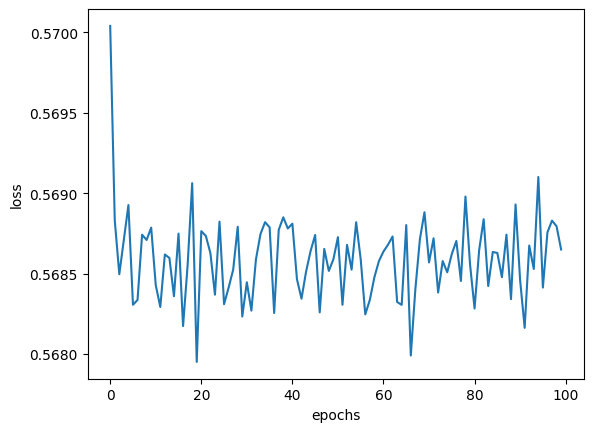

In [17]:
# Plot the training loss over epochs
plt.plot([i for i in range(len(train_loss_list))], train_loss_list)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [14]:
# Evaluate Model Performance on Validation Data

# Disable gradient calculations for evaluation using t.no_grad()
with t.no_grad():
    # Prepare the validation data
    X = t.Tensor(X_test).type(t.float32)  # Convert validation features to a PyTorch tensor
    Y = t.Tensor(Y_test).type(t.float32)  # Convert validation labels to a PyTorch tensor

    # Calculate predictions on the validation data
    probs = forward(X)  # Pass validation data through the trained model
    loss = loss_fn(probs.view(-1), Y)  # Compute the loss between predictions and actual labels

    # Print the validation loss
    print(loss.item())

    # Now, evaluate the model on the training data
    X = t.Tensor(X_train).type(t.float32)  # Convert training features to a PyTorch tensor
    Y = t.Tensor(Y_train).type(t.float32)  # Convert training labels to a PyTorch tensor

    # Calculate predictions on the training data
    probs = forward(X)  # Pass training data through the trained model
    loss = loss_fn(probs.view(-1), Y)  # Compute the loss between predictions and actual labels

    # Print the training loss
    print(loss.item())

0.4459001123905182
0.4438626766204834


Testing model has similar loss function compared to training. However, we will still run regularization to see if we will get different values

Regularized Training of Neural Network in PyTorch


---



In [11]:
# Define hyperparameters
number_of_input_features = 13
number_of_hidden_units = 5
epochs = 100
learning_rate = 0.01
batch_size = 32
landa = 0.01  # Regularization term (lambda)
dropout_probability = 0.6  # Probability of dropping out a neuron in dropout layer

# Prepare the data
X_train_tensor = t.Tensor(X_train_resampled).type(t.float32)
Y_train_tensor = t.Tensor(Y_train_resampled).type(t.float32)

X_test_tensor = t.Tensor(X_test).type(t.float32)
Y_test_tensor = t.Tensor(Y_test).type(t.float32)

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the neural network model with regularization
model = nn.Sequential(
    nn.Linear(number_of_input_features, number_of_hidden_units),  # Linear layer for matrix multiplication and bias addition
    nn.ReLU(),  # ReLU activation function
    Dropout(dropout_probability),
    nn.Linear(number_of_hidden_units, 1),  # Another linear layer
    nn.Sigmoid()  # Sigmoid activation for probability output
)

# Define the optimizer
optimizer = Adam(model.parameters(), lr=learning_rate)

# Define the loss function with Binary Cross-Entropy Loss
loss_fn = nn.BCELoss()

# Lists to store training accuracy, validation accuracy, and training loss over epochs
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

for epoch in range(epochs):
    if epoch % 500 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []

    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = model(X)

        # Adding regularization term for all parameters in the model
        l2_term = sum([(w ** 2).sum() for w in model.parameters()])

        # New loss is the old loss + regularization term
        loss = loss_fn(probs.view(-1), Y) + landa * l2_term

        per_epoch_loss_list.append(loss.item())

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate the model on training and validation data
    with t.no_grad():
        # Set the model in eval mode; some layers use this for certain calculations during training
        model.eval()

        # Calculate accuracy on train data
        probs = model(X_train_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        train_accuracy = (prediction == Y_train_tensor).type(t.float32).mean().item()

        # Calculate accuracy on validation data
        probs = model(X_test_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        validation_accuracy = (prediction == Y_test_tensor).type(t.float32).mean().item()

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}, Validation Accuracy: {validation_accuracy}')

        # Set the model back to train mode
        model.train()

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

Epoch 0/100 ---> Train Accuracy: 0.7265686392784119, Validation Accuracy: 0.705244243144989
Epoch 1/100 ---> Train Accuracy: 0.7272806763648987, Validation Accuracy: 0.6984874606132507
Epoch 2/100 ---> Train Accuracy: 0.7248103618621826, Validation Accuracy: 0.6890032291412354
Epoch 3/100 ---> Train Accuracy: 0.7323520183563232, Validation Accuracy: 0.7287998795509338
Epoch 4/100 ---> Train Accuracy: 0.732221245765686, Validation Accuracy: 0.6896231174468994
Epoch 5/100 ---> Train Accuracy: 0.7270627021789551, Validation Accuracy: 0.7102653384208679
Epoch 6/100 ---> Train Accuracy: 0.7290825247764587, Validation Accuracy: 0.7224150896072388
Epoch 7/100 ---> Train Accuracy: 0.7321485877037048, Validation Accuracy: 0.714356541633606
Epoch 8/100 ---> Train Accuracy: 0.7281670570373535, Validation Accuracy: 0.7002231478691101
Epoch 9/100 ---> Train Accuracy: 0.7295620441436768, Validation Accuracy: 0.7156583070755005
Epoch 10/100 ---> Train Accuracy: 0.730535626411438, Validation Accuracy:

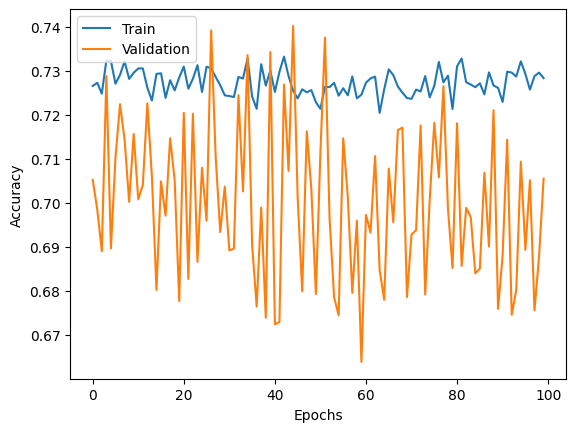

In [12]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()